In [25]:
import os
import warnings
warnings.filterwarnings('ignore')
#from pylab import rcParams
#rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

In [27]:
adanipow = pd.read_csv('adani.csv')
adanipow.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,7-September-2021,94.65,96.00,93.10,93.10,93.348581,638173,10278,59572544.0,638173.0,100.0,2.90,-1.55
1,6-September-2021,98.00,102.00,98.00,98.00,98.522598,1190343,16010,117275685.0,1190343.0,100.0,4.00,0.00
2,3-September-2021,113.40,113.50,103.15,103.15,105.669282,3126487,32611,330373637.0,3126487.0,100.0,10.35,-10.25
3,2-September-2021,108.55,108.55,107.05,108.55,108.529121,1019385,4467,110632958.0,1019385.0,100.0,1.50,0.00
4,1-September-2021,102.00,103.40,100.50,103.40,103.080813,921700,6167,95009585.0,921700.0,100.0,2.90,1.40


In [28]:
adanipow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2647 entries, 0 to 2646
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2647 non-null   object 
 1   Open Price                 2647 non-null   float64
 2   High Price                 2647 non-null   float64
 3   Low Price                  2647 non-null   float64
 4   Close Price                2647 non-null   float64
 5   WAP                        2647 non-null   float64
 6   No.of Shares               2647 non-null   int64  
 7   No. of Trades              2647 non-null   int64  
 8   Total Turnover (Rs.)       2647 non-null   float64
 9   Deliverable Quantity       2646 non-null   float64
 10  % Deli. Qty to Traded Qty  2646 non-null   float64
 11  Spread High-Low            2647 non-null   float64
 12  Spread Close-Open          2647 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

In [30]:
fig = px.line(adanipow, x='Date', y='Open Price',labels={'Date': 'Date', 'Open Price':'Opening Price'},title = "Adani Power Opening Stock Price")
fig.show()

<AxesSubplot:>

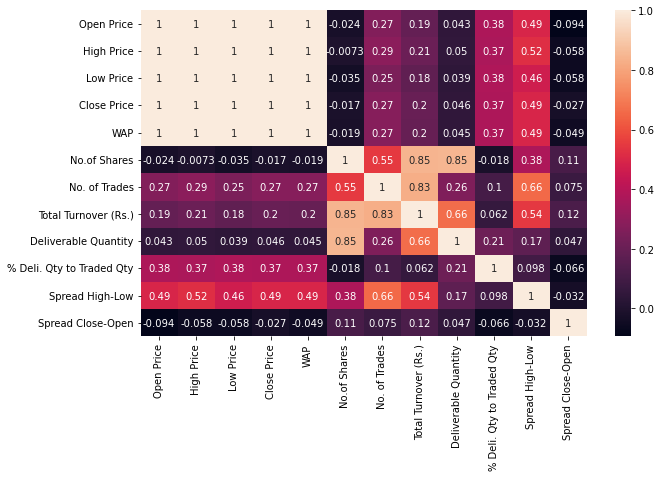

In [47]:
corr = adanipow.corr()
sns.heatmap(corr,annot= True)

In [31]:
fig = px.line(adanipow, x='Date', y='Close Price',labels={'Date': 'Date', 'Open Price':'Closing Price'},title = "Adani Power Closing Stock Price")
fig.show()

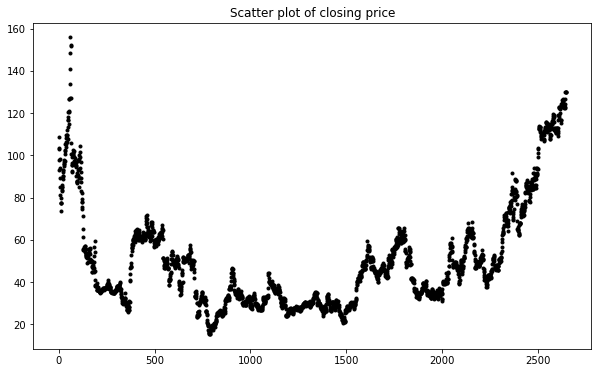

In [33]:
plt.figure(figsize=(10,6))
adani_close = adanipow['Close Price']
adani_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

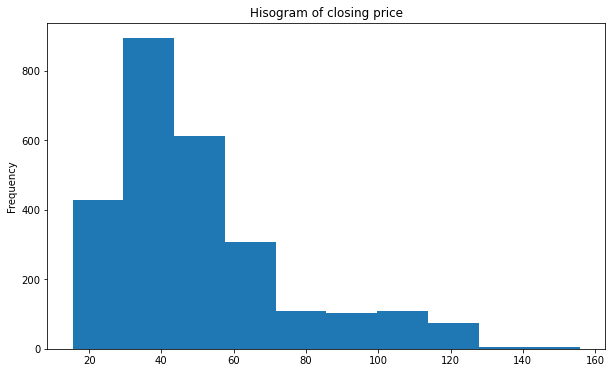

In [35]:
plt.figure(figsize=(10,6))
adani_close = adanipow['Close Price']
adani_close.plot(style='k.',kind='hist')
plt.title('Hisogram of closing price')
plt.show()

###   Before proceeding further it would be nice to formulate null and alternative hypothesis for the stock prices
Testing For Stationarity:

To identify the nature of the data, we will be using the null hypothesis.

H0: The null hypothesis: It is a statement about the population that either is believed to be true or is used to put forth an argument unless it can be shown to be incorrect beyond a reasonable doubt.

H1: The alternative hypothesis: It is a claim about the population that is contradictory to H0 and what we conclude when we reject H0.

#Ho: It is non-stationary
#H1: It is stationary
If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear.

If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

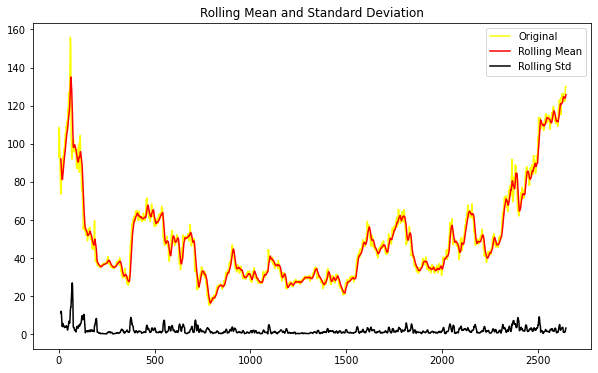

Results of dickey fuller test
Test Statistics                  -0.820084
p-value                           0.813151
No. of lags used                 12.000000
Number of observations used    2634.000000
critical value (1%)              -3.432835
critical value (5%)              -2.862638
critical value (10%)             -2.567354
dtype: float64


In [37]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(adanipow['Close Price'])

Since p value of the data is more than 0.05, we CANNOT reject the NULL Hypothesis.

<Figure size 720x432 with 0 Axes>

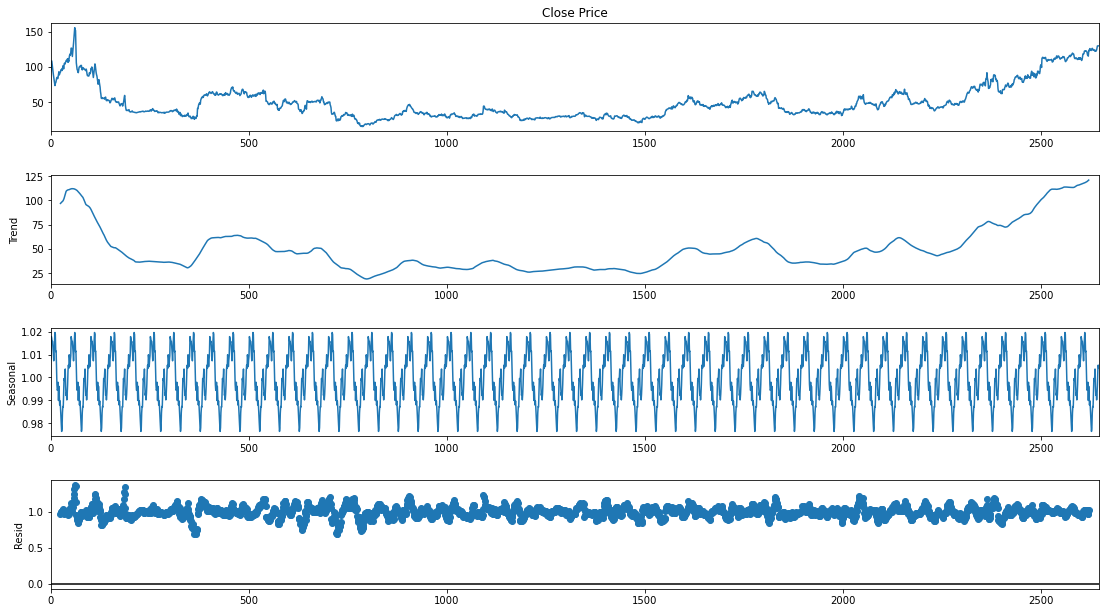

In [52]:
result = seasonal_decompose(adani_close, model='multiplicative', freq = 50)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

<Figure size 720x432 with 0 Axes>

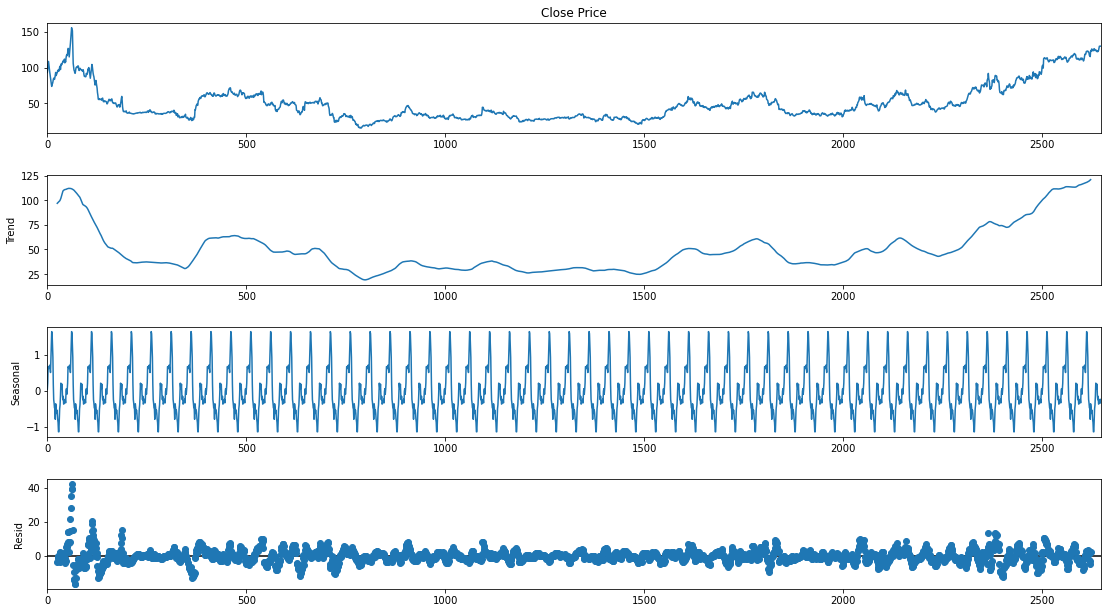

In [49]:
result = seasonal_decompose(adani_close, model='additive', freq = 50)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


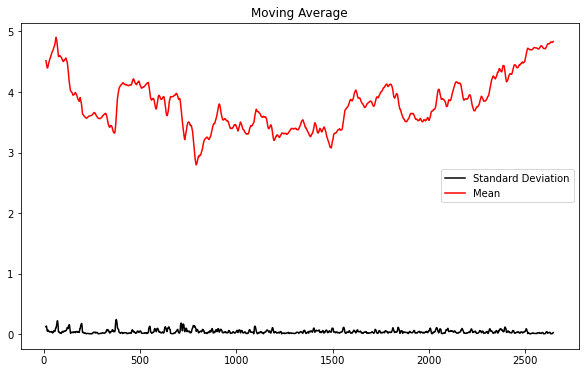

In [43]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(adanipow['Close Price'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

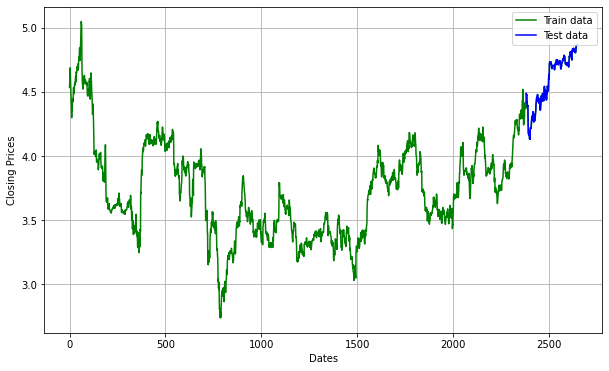

In [44]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [45]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
test='adf',       # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1,              # frequency of series
d=None,           # let model determine 'd'
seasonal=False,   # No Seasonality
start_P=0, 
D=0, 
trace=True,
error_action='ignore',  
suppress_warnings=True, 
stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9443.588, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9467.255, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9464.427, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9445.572, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-9473.318, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-9471.839, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9471.789, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9472.924, Time=0.92 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-9469.814, Time=0.45 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-9475.307, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-9469.242, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-9473.828, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-9473.778, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-9474.541, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0

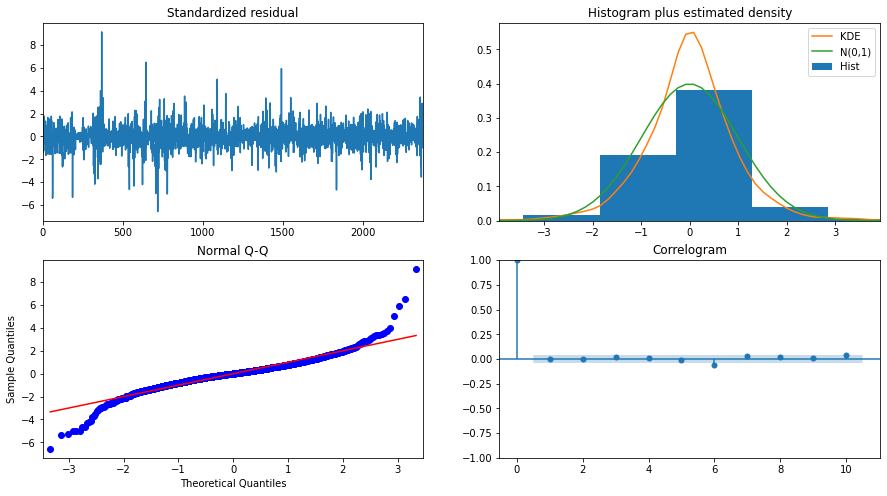

In [46]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [53]:
model = ARIMA(train_data, order=(3, 1, 2))
fitted = model.fit(disp=-1)
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.Close Price   No. Observations:                 2378
Model:                 ARIMA(3, 1, 2)   Log Likelihood                4744.479
Method:                       css-mle   S.D. of innovations              0.033
Date:                Wed, 08 Sep 2021   AIC                          -9474.957
Time:                        15:47:29   BIC                          -9434.539
Sample:                             1   HQIC                         -9460.246
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -8.254e-05      0.001     -0.106      0.916      -0.002       0.001
ar.L1.D.Close Price     1.2013      0.314      3.822      0.000       0.585       1.817
ar.L2.D.Close Pr

In [452]:
fc, se, conf = fitted.forecast(265, alpha=0.05)

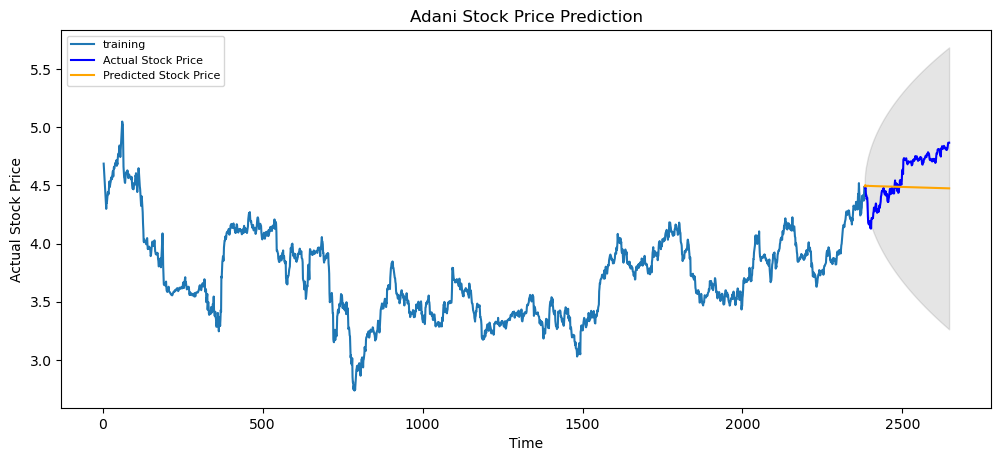

In [453]:
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Adani Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [459]:
predictions_ARIMA = np.exp(fc_series)
predictions_ARIMA.to_csv('AdaniPow.csv')